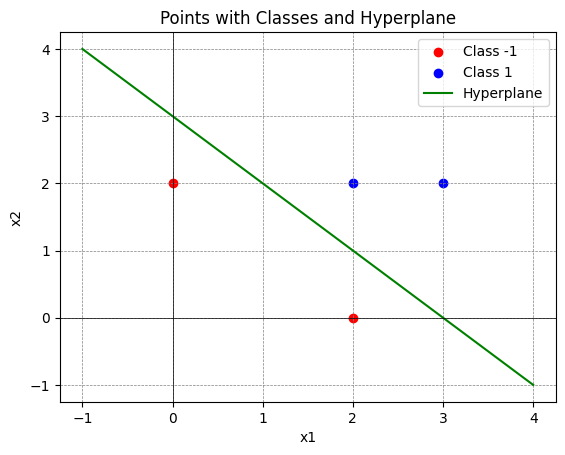

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Points with labels
points = [
    ([0, 2], -1),
    ([2, 0], -1),
    ([2, 2], 1),
    ([3, 2], 1)
]

# Separate points by class
negative_points = [p[0] for p in points if p[1] == -1]
positive_points = [p[0] for p in points if p[1] == 1]

# Convert to x and y lists for plotting
neg_x, neg_y = zip(*negative_points)
pos_x, pos_y = zip(*positive_points)

# Plot points
plt.scatter(neg_x, neg_y, color='red', label='Class -1')
plt.scatter(pos_x, pos_y, color='blue', label='Class 1')

# Define the hyperplane
x1 = np.linspace(-1, 4, 100)  # Generate x1 values from -1 to 4
x2 = -1 * x1 + 3              # Calculate x2 using the line equation

# Plot the hyperplane
plt.plot(x1, x2, color='green', label='Hyperplane')

# Add labels and legend
plt.title('Points with Classes and Hyperplane')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


 1. What is the geometric shape of the optimal hyperplane?

A line

 2. Determine the optimal hyperplane (w and b). Note: It is not necessary to setup a Lagrange
 function and run the optimization procedure. Just take a good look!

-1 + 3

 3. Compute the width of the margin.

1/sqrt(-1*-1) = 1

 4. Classify the instance p14q.

by look: class 1
by calculation: 1*-1+3 = 2

 5. Which instances are support vectors?

 point 2,0 0,2 and 2,2

## Ecercise 3: 
1. Create an example of a dataset that is easily classifiable using a linear SVM.
 2. Create an example of a dataset that is not classifiable using a linear SVM.

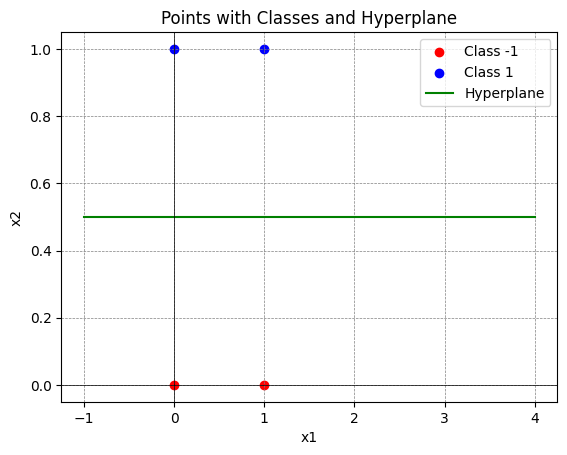

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Points with labels
points = [
    ([0, 0], -1),
    ([1, 0], -1),
    ([0, 1], 1),
    ([1, 1], 1)
]

# Separate points by class
negative_points = [p[0] for p in points if p[1] == -1]
positive_points = [p[0] for p in points if p[1] == 1]

# Convert to x and y lists for plotting
neg_x, neg_y = zip(*negative_points)
pos_x, pos_y = zip(*positive_points)

# Plot points
plt.scatter(neg_x, neg_y, color='red', label='Class -1')
plt.scatter(pos_x, pos_y, color='blue', label='Class 1')

# Define the hyperplane
x1 = np.linspace(-1, 4, 100)  # Generate x1 values from -1 to 4
x2 = 0*x1 + 0.5           # Calculate x2 using the line equation

# Plot the hyperplane
plt.plot(x1, x2, color='green', label='Hyperplane')

# Add labels and legend
plt.title('Points with Classes and Hyperplane')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


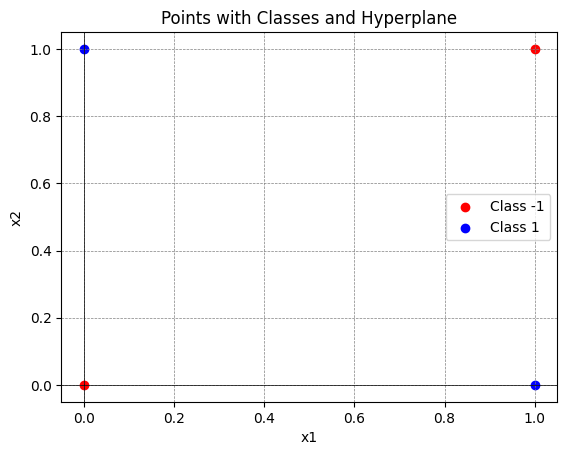

In [ ]:
# Points with labels
points = [
    ([0, 0], -1),
    ([1, 1], -1),
    ([0, 1], 1),
    ([1, 0], 1)
]

# Separate points by class
negative_points = [p[0] for p in points if p[1] == -1]
positive_points = [p[0] for p in points if p[1] == 1]

# Convert to x and y lists for plotting
neg_x, neg_y = zip(*negative_points)
pos_x, pos_y = zip(*positive_points)

# Plot points
plt.scatter(neg_x, neg_y, color='red', label='Class -1')
plt.scatter(pos_x, pos_y, color='blue', label='Class 1')

# # Define the hyperplane
# x1 = np.linspace(-1, 4, 100)  # Generate x1 values from -1 to 4
# x2 = 0*x1 + 0.5           # Calculate x2 using the line equation

# Plot the hyperplane
# plt.plot(x1, x2, color='green', label='Hyperplane')

# Add labels and legend
plt.title('Points with Classes and Hyperplane')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


## Exercise 4
Create a Jupyter Notebook for predicting wine cultivars using SVMs.
1. Download the wine dataset from UCI Machine Learning Repository.
2. Load the dataset as a pandas data frame and assign it a proper header.


In [37]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features
y = wine.data.targets 



In [13]:
X["class"] = y

3. To create a binary problem restrict the rows to those with class 2 or 3


In [ ]:
df = X[X["class"] > 1]

119

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

4. Split the dataset 50:50 into training and test data
5. Use the random seed 1 if you use random


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, stratify=y, random_state=1)

In [26]:
# Describe the properities of an SVM
# clf the classifier
# X features
# y labels
# param_name the parameter we investigate (e.g. with different values)
# param the parameter value
def describe_svm(clf, X, y, param_name, param):
    clf.fit(X, y)
    sv=clf.support_vectors_
    y_pred=clf.predict(X)
    acc=round(metrics.accuracy_score(y, y_pred),5)
    print(f"{param_name}: ", param, "   svs: ", len(sv), "   train-acc: ", acc)

6. Create a classification experiment for linear (soft-margin) SVMs


In [30]:
model = SVC(kernel='linear', C=1E-2)
model.fit(X, y)
describe_svm(model, X, y, "C", 1E-2)

C:  0.01    svs:  44    train-acc:  0.98319


7. Investigate the impact of different choices of 𝐶 on training and test accuracy (draw and interpret
a suitable diagram)
8. Similarly compare the number of support vectors and the resulting margin for different choices
of 𝐶

In [33]:
Cs = (0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1,2,10,20,100,200)
support_vectors=[]
margin=[]
train_accs=[]

for C in Cs:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    
    support_vectors.append(len(clf.support_vectors_))

    w=clf.coef_[0]
    np.dot(w,w)
    margin.append(np.dot(w, w)**(-.5))

    y_pred=clf.predict(X)
    train_accs.append(round(metrics.accuracy_score(y, y_pred),5))


Text(0, 0.5, 'train-acc')

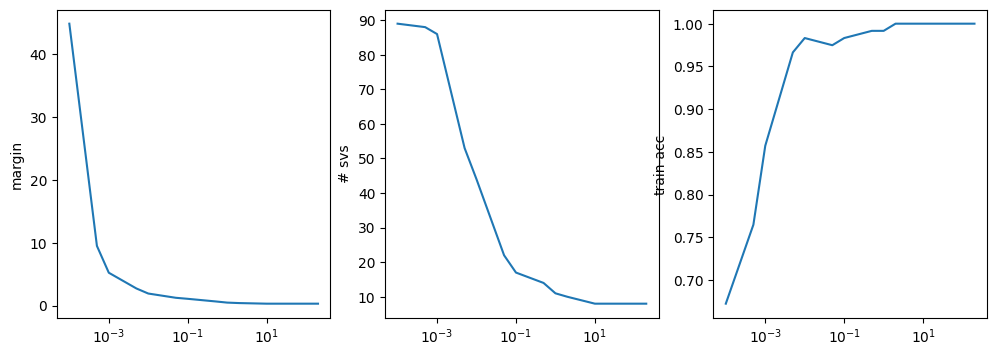

In [38]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].set_xscale('log')
ax[0].plot(Cs, margin)
ax[0].set_ylabel('margin')
ax[1].set_xscale('log')
ax[1].plot(Cs, support_vectors)
ax[1].set_ylabel('# svs')
ax[2].set_xscale('log')
ax[2].plot(Cs, train_accs) 
ax[2].set_ylabel('train-acc')

9. Which test accuracy do you achieve with the best parametrization?

In [42]:
model = SVC(kernel='linear', C=1E1)
model.fit(X, y)
describe_svm(model, X, y, "C", 1E1)

C:  10.0    svs:  8    train-acc:  1.0


10. Now experiment with the radial basis function and with the polynomial kernel. Here multiple
hyperparameters must be selected.

a) Fix 𝐶 “ 100 and vary 𝛾 for the radial basis function.

b) Fix 𝐶 “ 100 and vary the degree for the polynomial kernel
2

In [48]:
for gamma in (0.01, 0.1, 0.5, 1, 10, 100, 1000):
    clf = SVC(kernel='rbf', gamma=gamma, C=100)
    describe_svm(clf, X.values, y, param_name="degree", param=gamma)

degree:  0.01    svs:  110    train-acc:  1.0
degree:  0.1    svs:  119    train-acc:  1.0
degree:  0.5    svs:  119    train-acc:  1.0
degree:  1    svs:  119    train-acc:  1.0
degree:  10    svs:  119    train-acc:  1.0
degree:  100    svs:  119    train-acc:  1.0
degree:  1000    svs:  119    train-acc:  1.0


In [49]:
for degree in (1, 2, 3, 4, 5, 6):
    clf = SVC(kernel='poly', degree=degree, gamma=2, coef0=1, C=100, tol=1E-5)
    describe_svm(clf, X.values, y, param_name="degree", param=degree)

degree:  1    svs:  8    train-acc:  1.0
degree:  2    svs:  11    train-acc:  1.0
degree:  3    svs:  10    train-acc:  1.0
degree:  4    svs:  9    train-acc:  1.0
degree:  5    svs:  10    train-acc:  1.0
degree:  6    svs:  10    train-acc:  1.0
